- Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
- Q2. Load the Wine Quality dataset and explore its dimensions.

**Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification**

- Q3. Check for null values, identify categorical variables, and encode them.
- Q4. Separate the features and target variables from the dataframe.
- Q5. Perform a train-test split and divide the data into training, validation, and test datasets.
- Q6. Perform scaling on the dataset.
- Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
- Q8. Create a Sequential model and add all the layers to it.
- Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
- Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
- Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
- Q12. Print the model summary.
- Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
- Q14. Compile the model with the specified loss function, optimizer, and metrics.
- Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
- Q16. Get the model's parameters.
- Q17. Store the model's training history as a Pandas DataFrame.
- Q18. Plot the model's training history.
- Q19. Evaluate the model's performance using the test data.

### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
%pip install tensorflow keras

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow
tensorflow.__version__

'2.13.0'

In [3]:
import keras
keras.__version__

'2.13.1'

### Q2. Load the Wine Quality dataset and explore its dimensions.
### Q3. Check for null values, identify categorical variables, and encode them.
### Q4. Separate the features and target variables from the dataframe.


In [4]:
import pandas as pd
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: title={'center': 'Wine Quality CountPlot'}, xlabel='quality'>

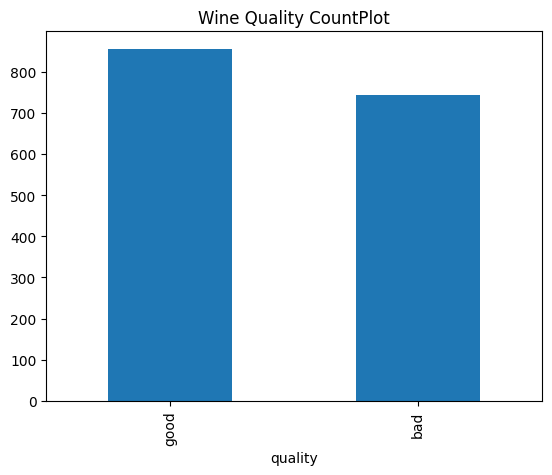

In [8]:
# Univariate analysis categorical feature
df['quality'].value_counts().plot(kind='bar',title='Wine Quality CountPlot')

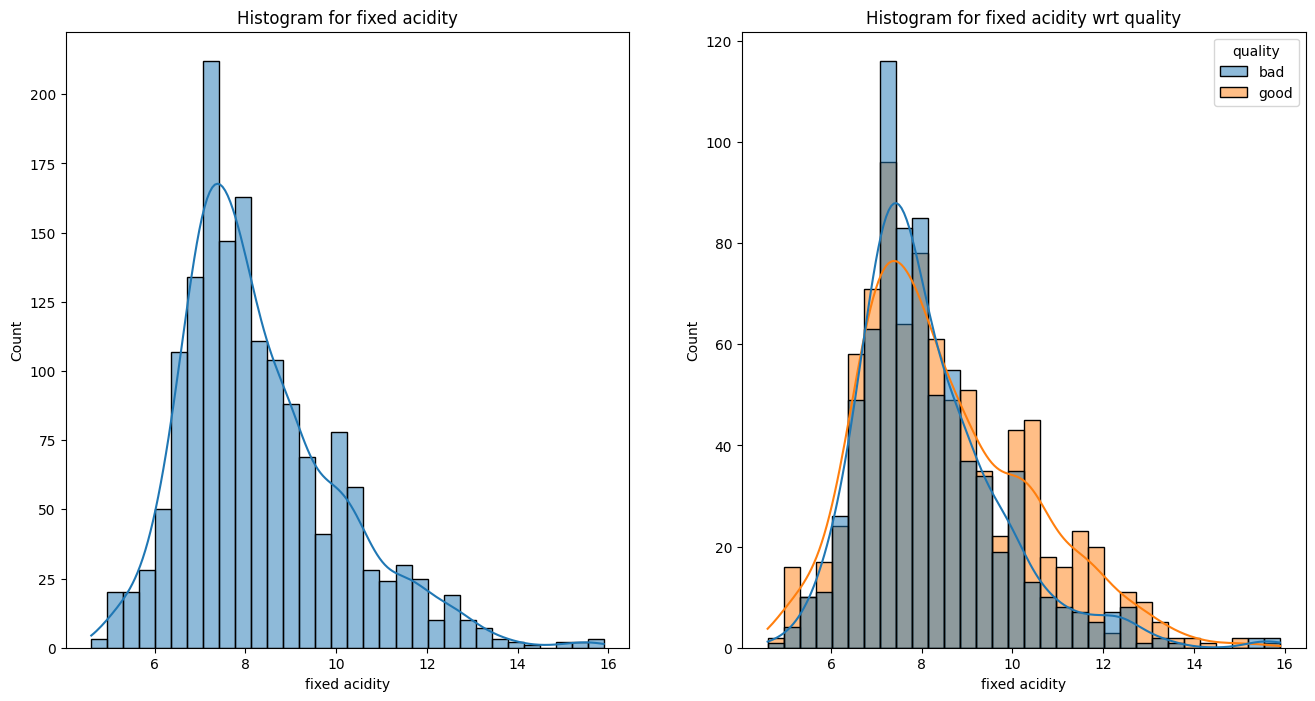

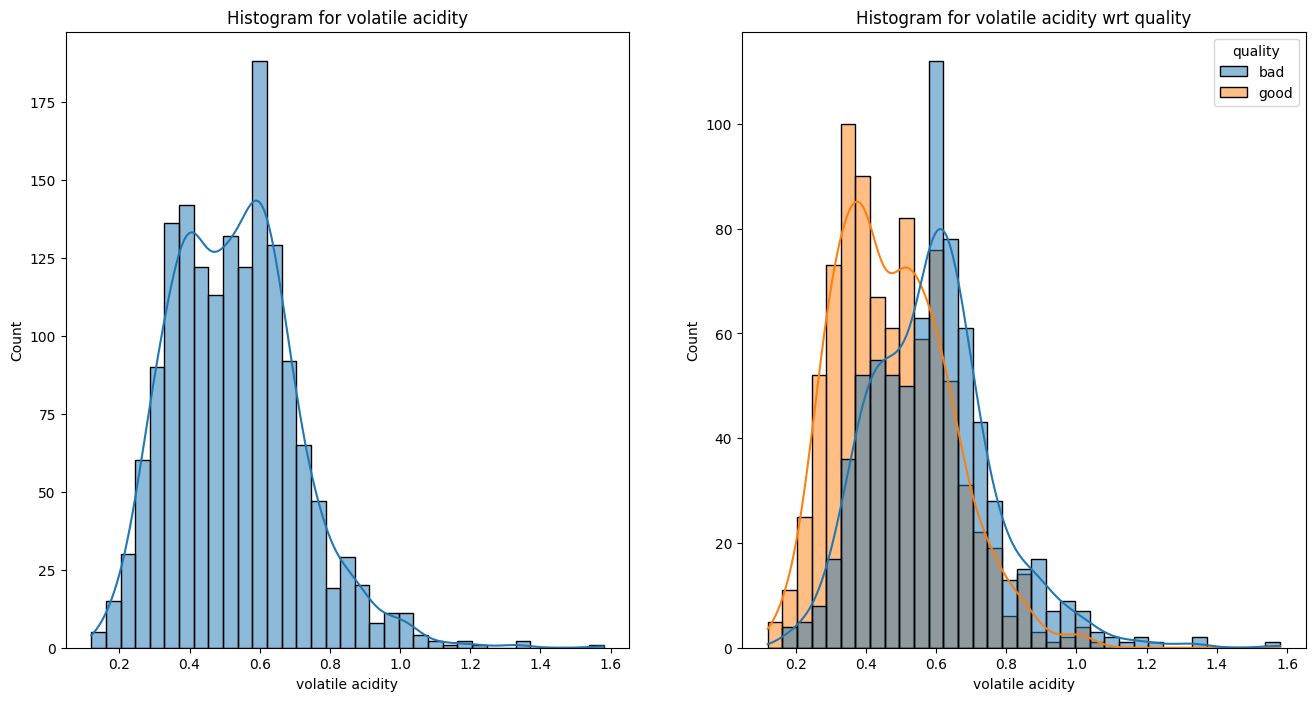

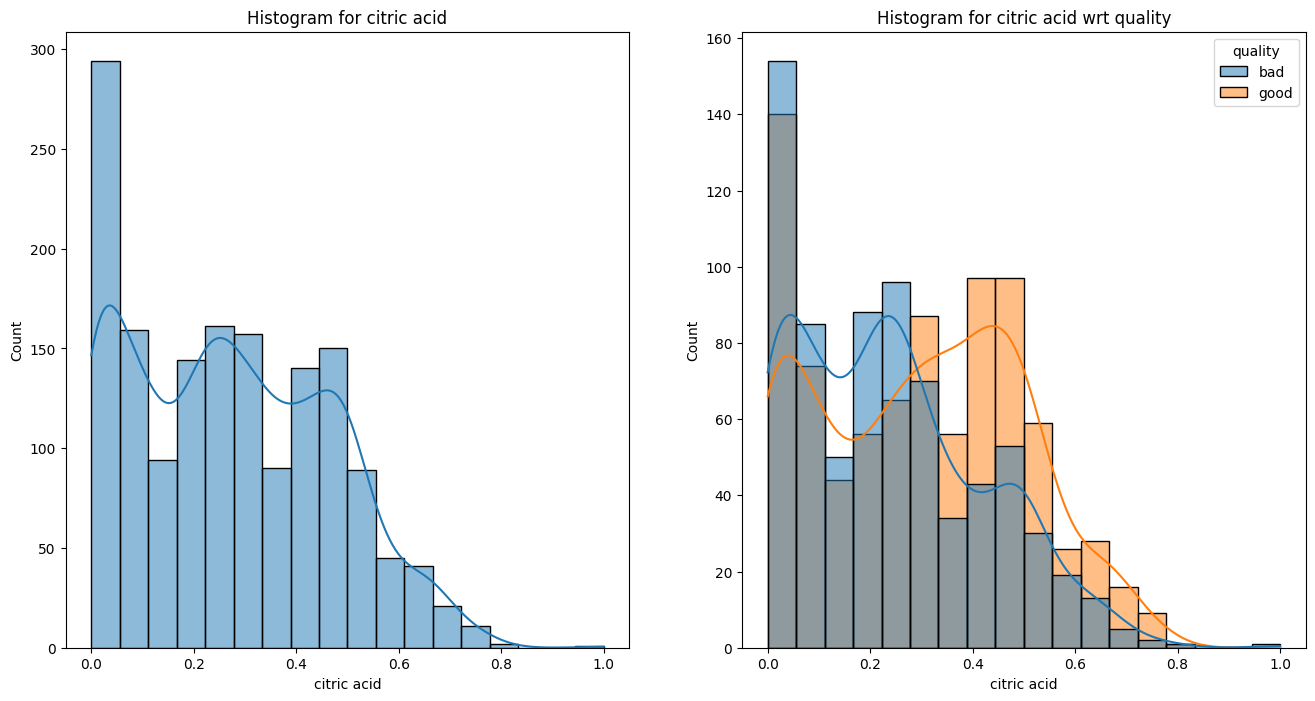

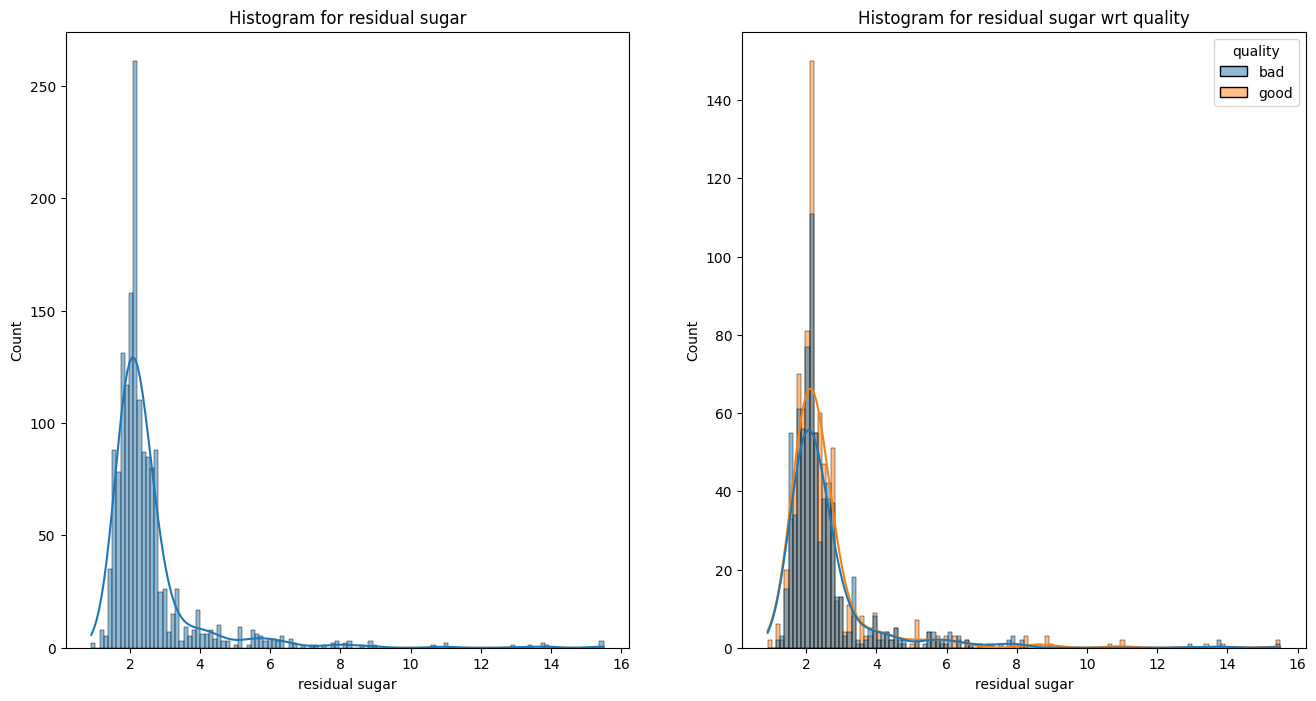

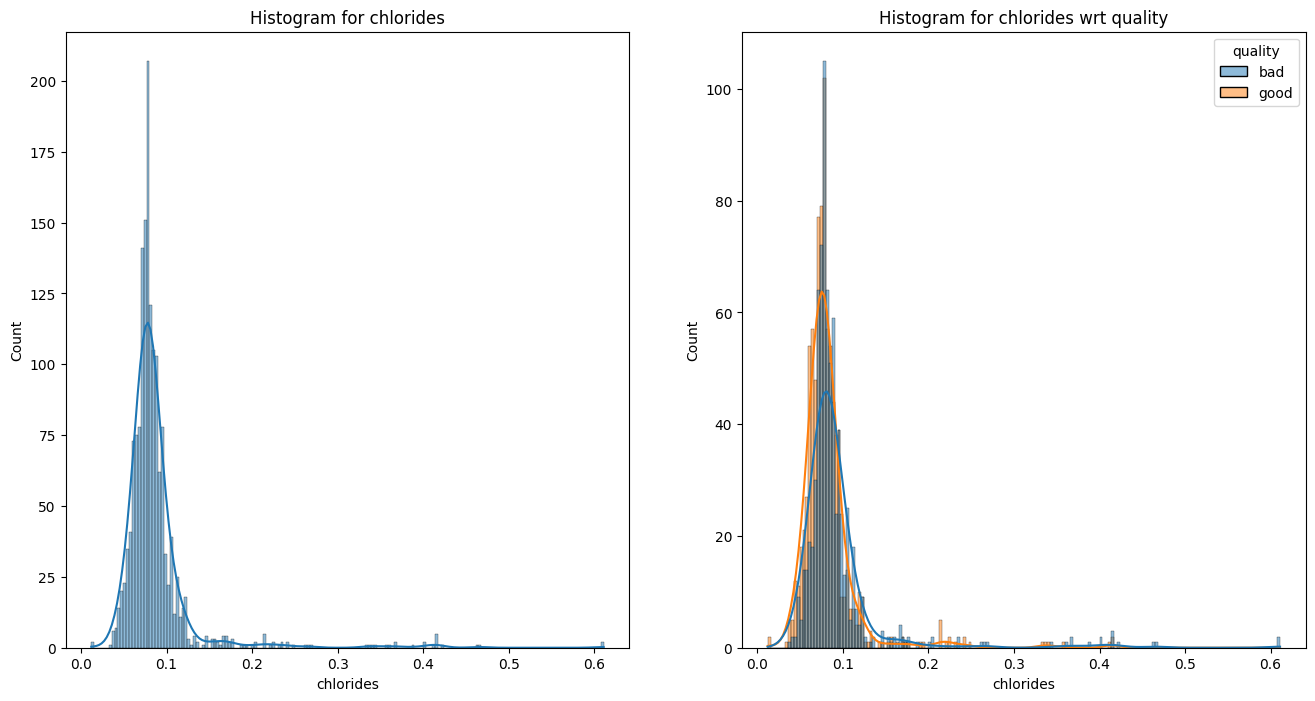

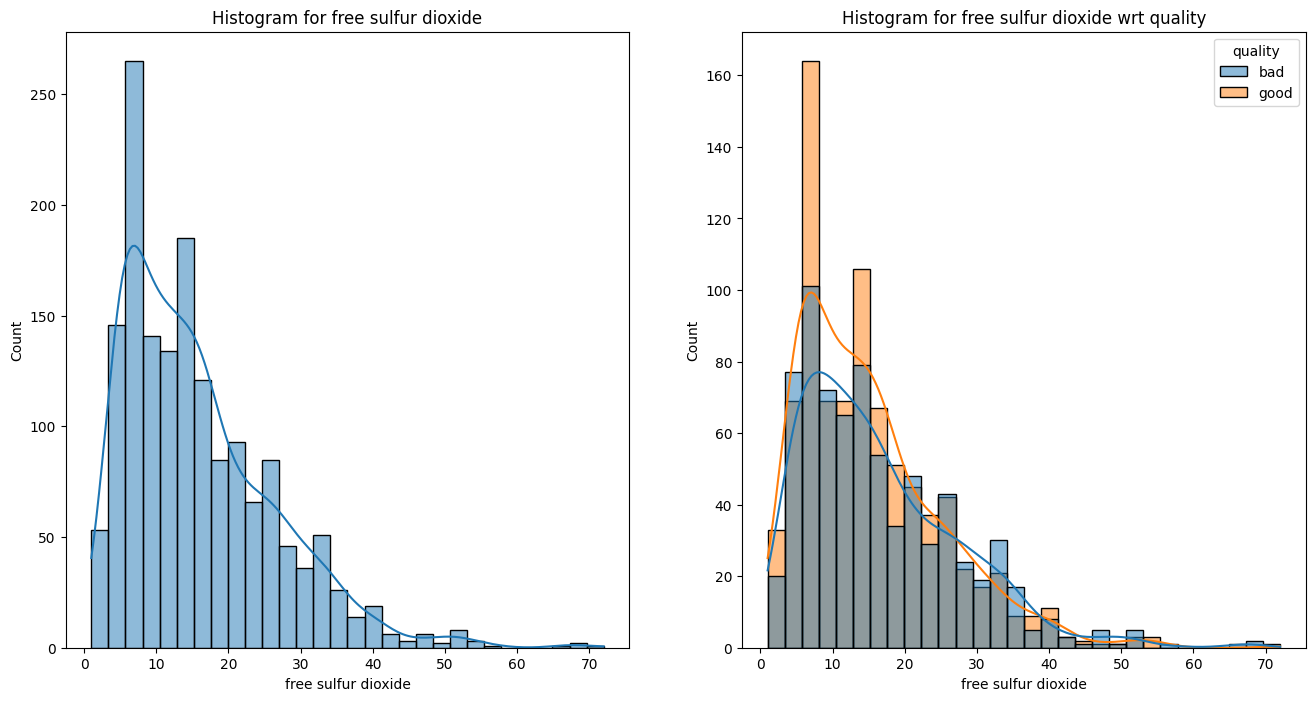

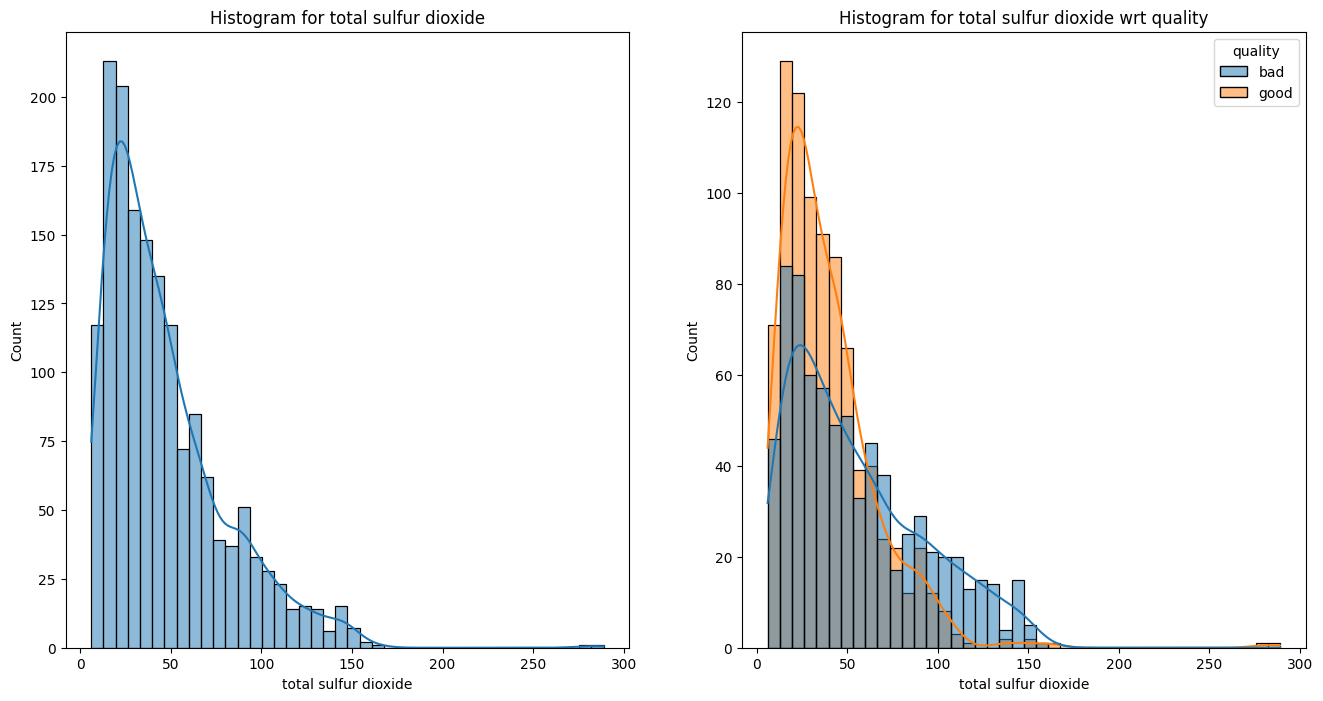

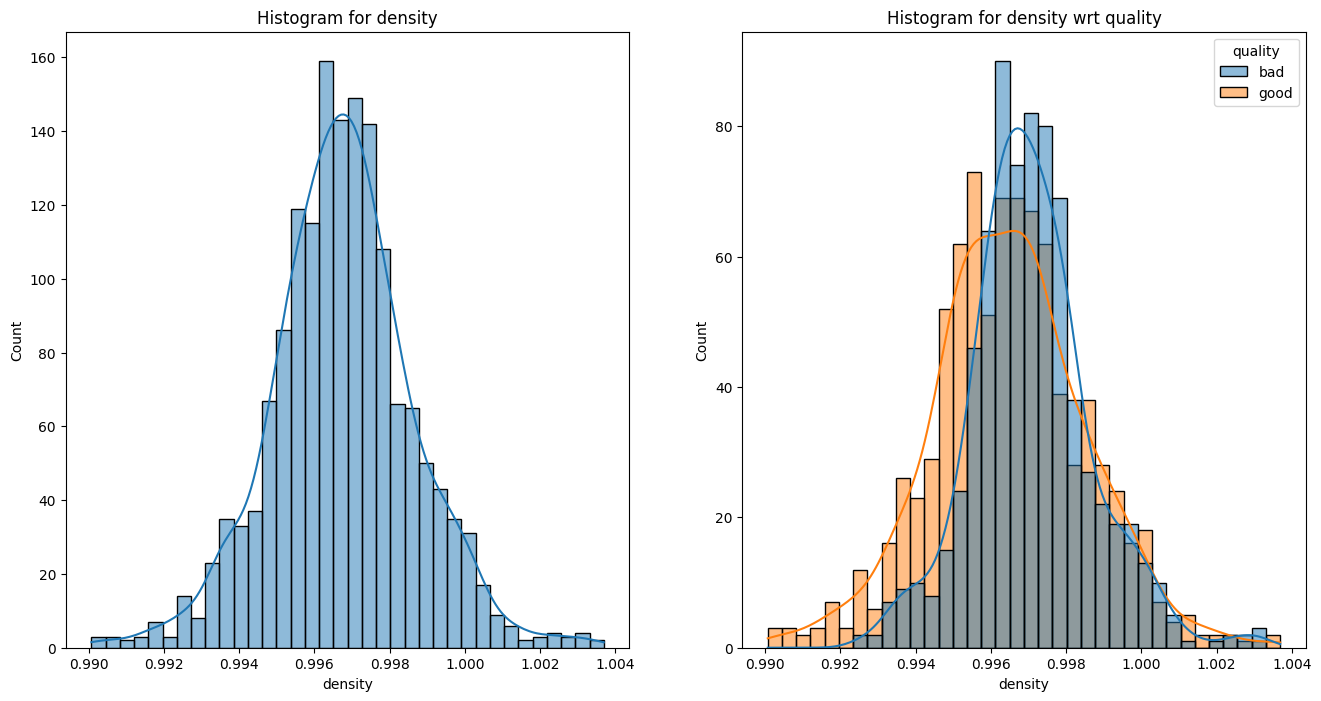

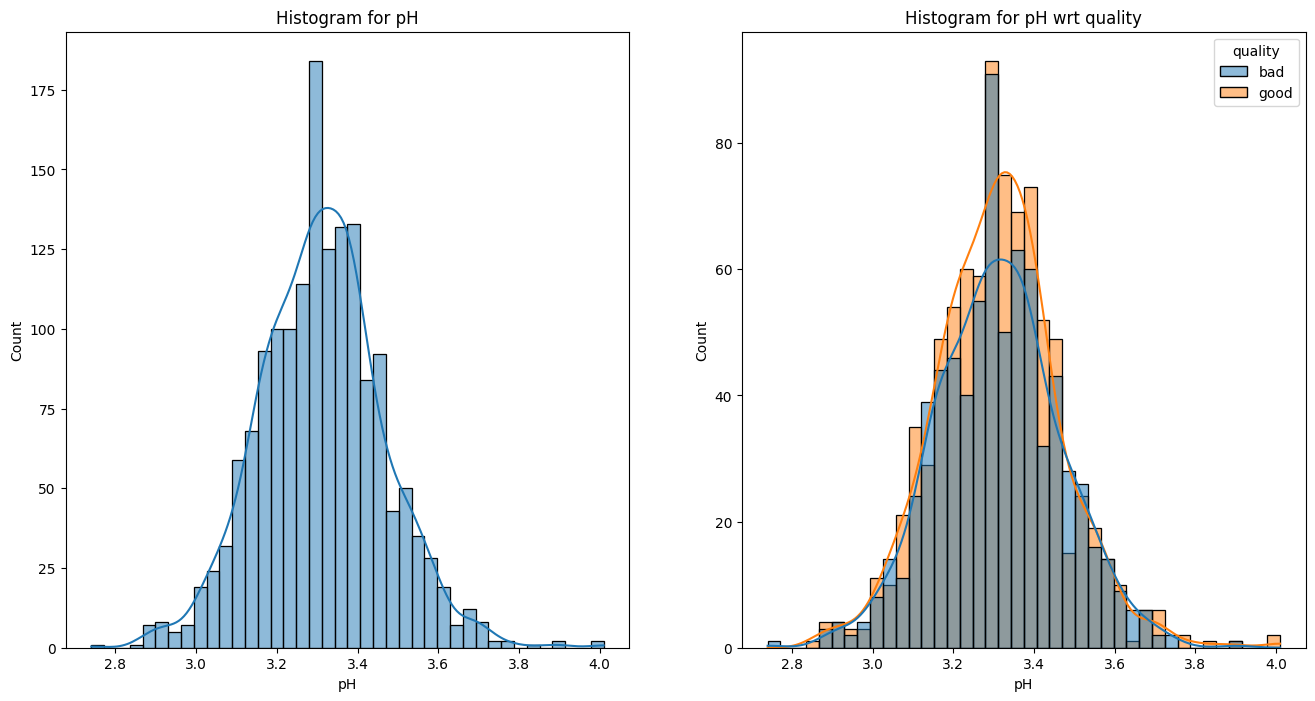

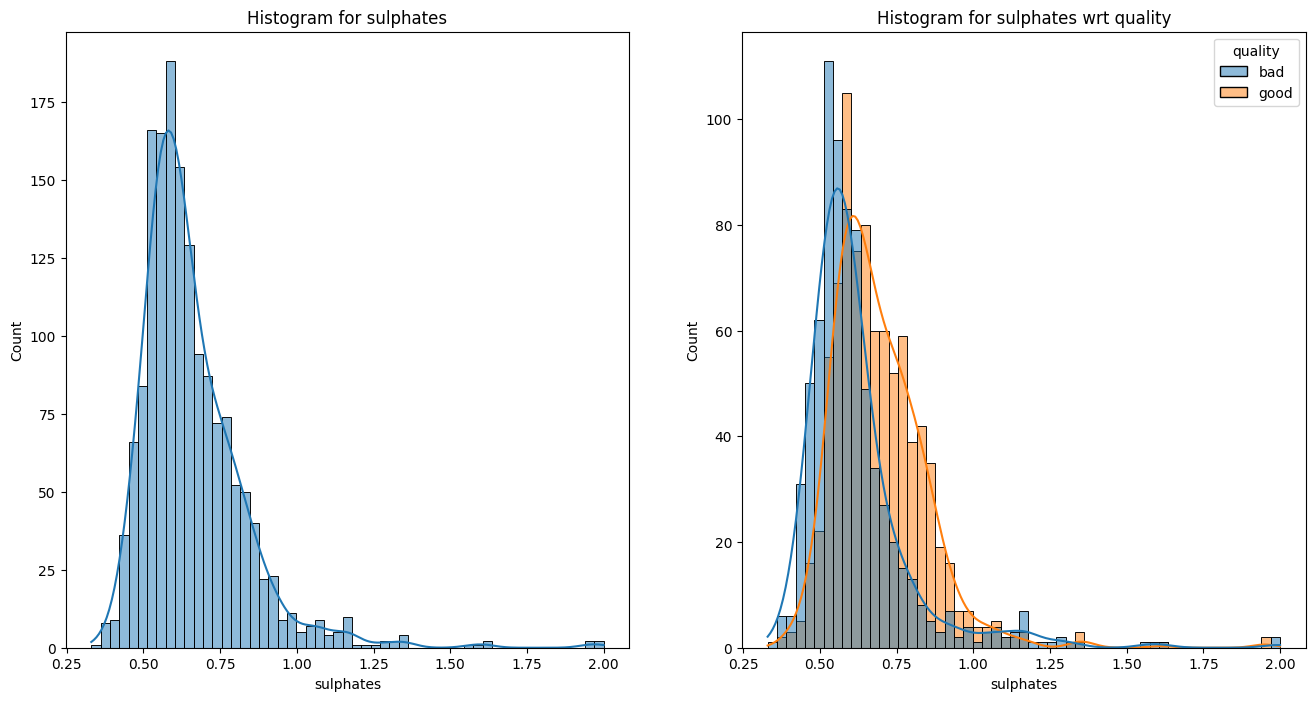

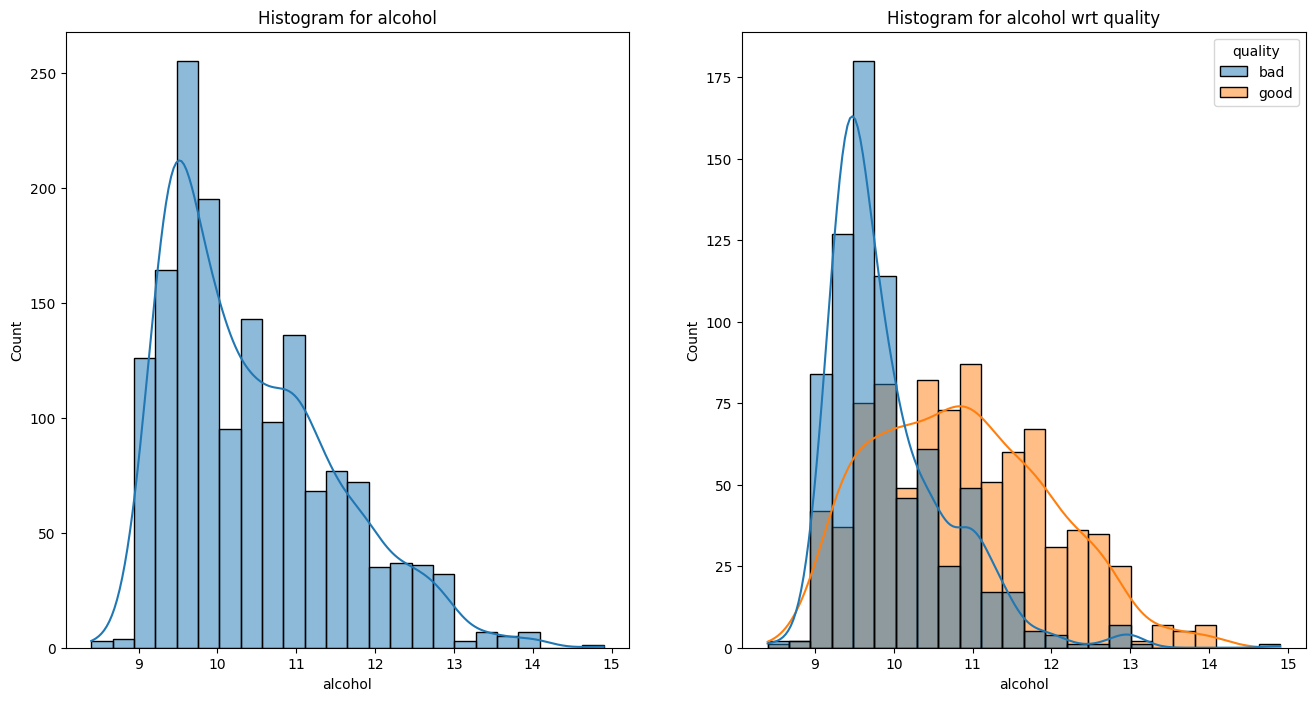

In [9]:
# Histogram for continous features
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    if df[i].dtype!='object':
        plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        sns.histplot(data=df,x=i,kde=True)
        plt.title(f'Histogram for {i}')
        
        plt.subplot(1,2,2)
        sns.histplot(data=df,x=i,hue='quality',kde=True)
        plt.title(f'Histogram for {i} wrt quality')

        plt.show()      

In [10]:
# Correlation heatmap
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


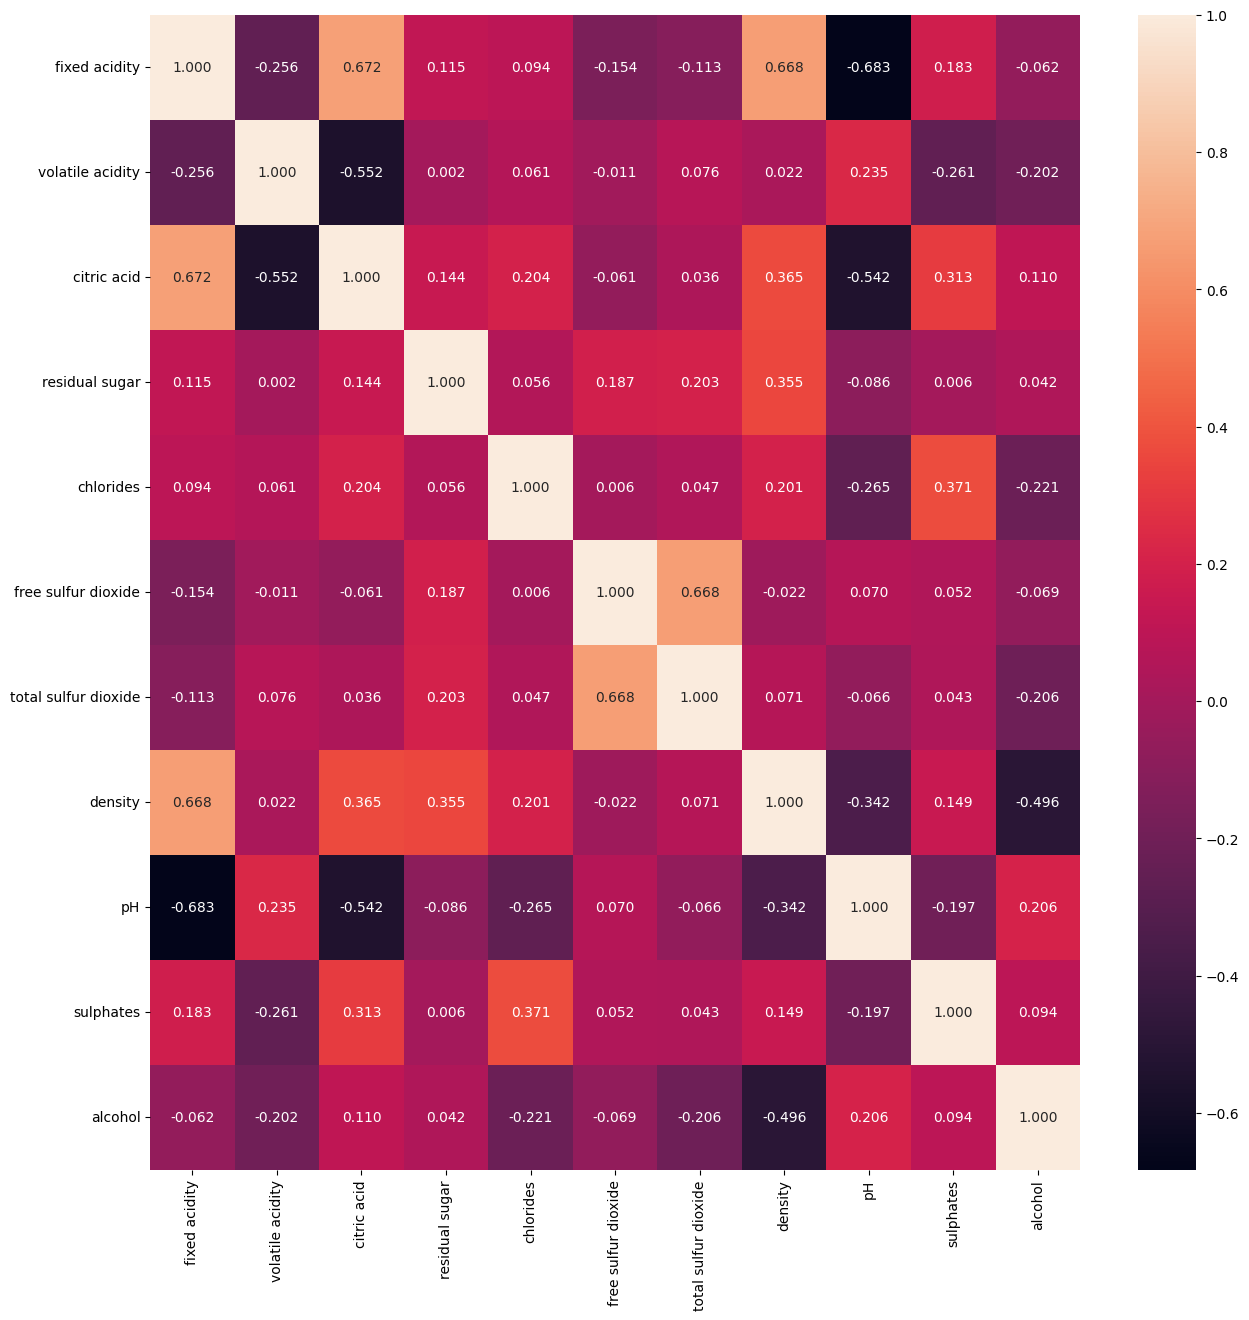

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.3f')
plt.show()

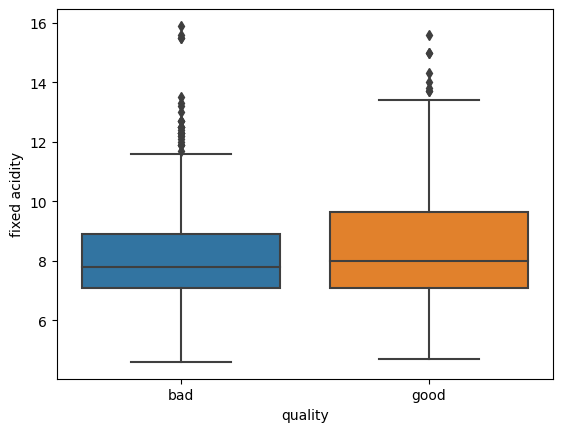

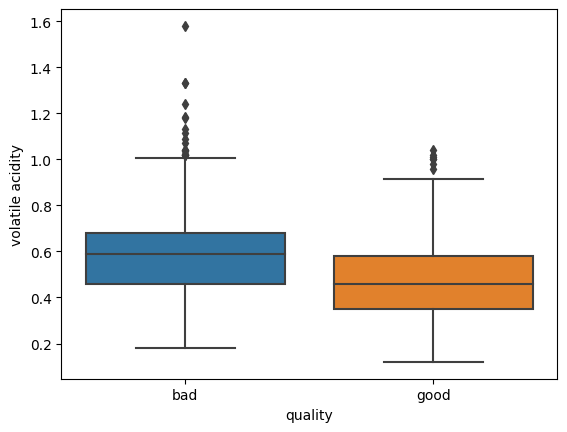

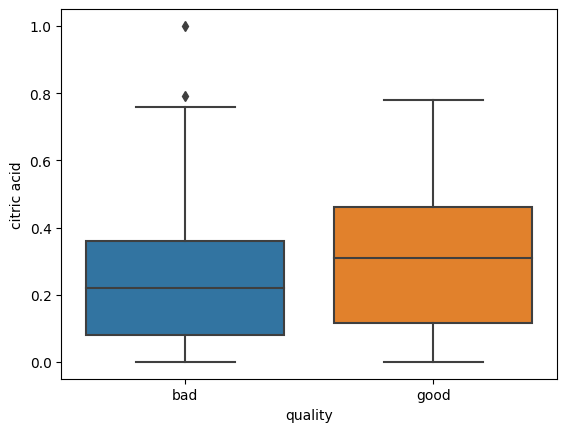

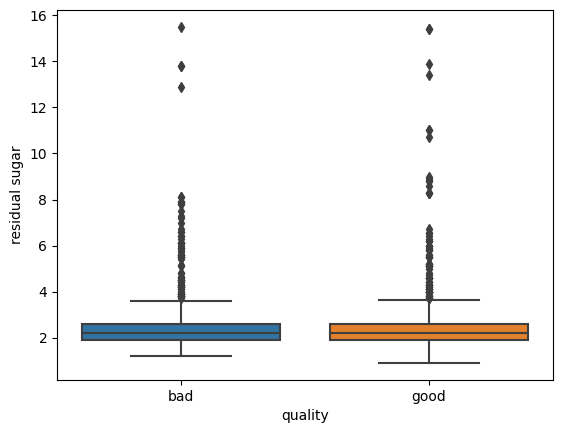

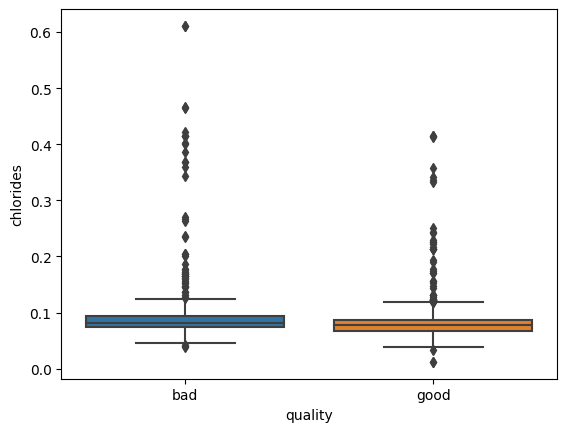

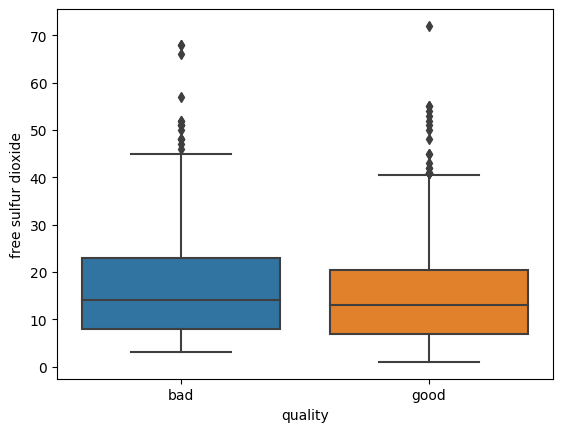

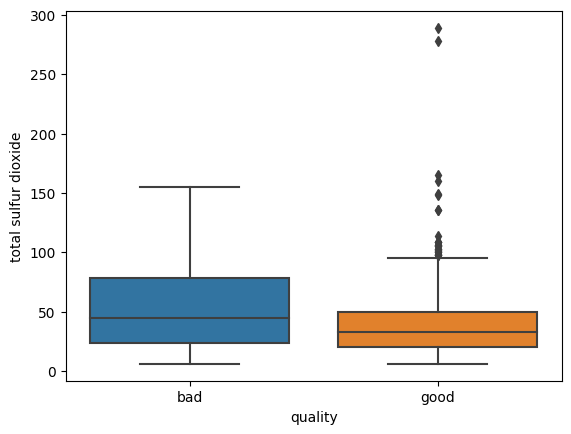

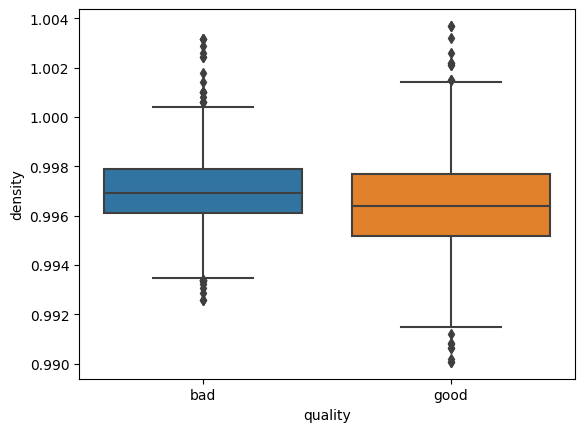

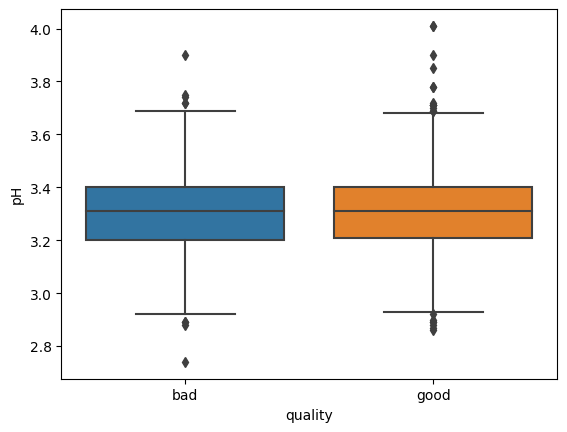

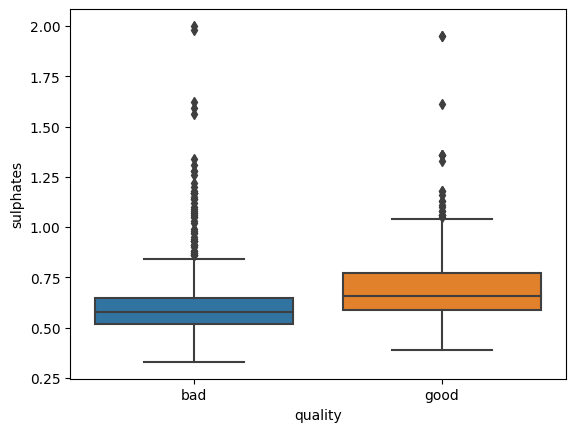

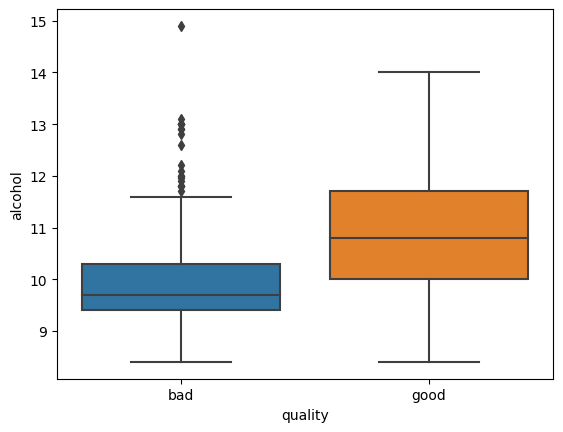

In [12]:
# Box Plot wrt Wine Quality
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(data=df,x='quality',y=i)
        plt.show()

In [13]:
# Checking duplicated values
df.duplicated().sum()

240

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(1359, 12)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [17]:
X = df.drop(labels=['quality'],axis=1)
y = df[['quality']]

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [19]:
y.head()

,quality
0,0
1,0
2,0
3,1
5,0


### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
xtrain.shape

(1087, 11)

In [22]:
xtest.shape

(272, 11)

### Q6. Perform scaling on the dataset.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scale = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest_scale = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [24]:
xtrain_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.351623,-0.828323,0.648771,-0.238440,-0.411606,-0.362070,-0.566298,-0.986612,-0.259822,0.519851,1.984240
1,-0.981548,0.965891,-0.989833,0.054589,0.312800,-0.168479,-0.596342,-0.025508,0.857267,-0.458489,-0.215867
2,-0.865620,0.180922,-1.245865,-0.604727,-0.106593,0.218703,-0.355992,0.055032,0.857267,-0.170742,-0.399209
3,-0.517836,0.853753,-0.580182,-0.531470,-0.220973,-0.362070,-0.235817,0.538268,1.251534,0.232104,-0.490880
4,-0.285980,0.349130,-0.477769,-0.165183,-0.259100,0.121907,0.214839,0.430882,0.791556,-0.400940,-0.399209


In [25]:
xtest_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.343944,0.517338,-1.194658,0.933678,-0.106593,0.896271,-0.055555,0.591961,0.200156,-0.746237,-0.857565
1,-0.054125,0.601441,-0.887420,-0.311698,-0.316290,0.896271,0.395101,-0.170479,-0.128400,0.519851,0.425831
2,0.061803,-0.884392,0.802390,-0.165183,-0.506923,-0.362070,-0.836691,-0.642977,-0.916933,0.865147,0.700844
3,0.931263,-0.211562,1.570486,0.713906,0.084040,-0.652457,-0.115642,1.987978,-0.128400,-0.458489,-1.315921
4,-1.155440,2.760106,-1.399484,-0.384955,-0.125657,0.121907,-0.686473,-1.249707,1.842934,-0.631138,0.700844


### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
### Q8. Create a Sequential model and add all the layers to it.


In [26]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [27]:
xtrain.shape[0]

1087

In [28]:
xtrain.shape[1]

11

In [29]:
layer1 = Dense(128,input_dim=xtrain.shape[1],activation='relu')
layer2 = BatchNormalization()
layer3 = Dropout(0.2)

layer4 = Dense(64,activation='relu')
layer5 = BatchNormalization()
layer6 = Dropout(0.2)

output = Dense(1,activation='sigmoid')

In [30]:
model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(output)

### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed

In [31]:
from keras.callbacks import TensorBoard

log_dir = "logs/"  # Choose a directory where TensorBoard will save logs and events

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [32]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [33]:
from keras.callbacks import ModelCheckpoint
# Define the checkpoint path where the best model will be saved
checkpoint_path = "model/best_model.h5"

# Create the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',  # Choose the metric to monitor for saving the best model
    mode='min',          # Set 'max' if the metric should be maximized (e.g., accuracy)
    save_best_only=True, # Only save the best model (True: overwrite the previous best model)
    verbose=1            # Verbosity mode. 0: silent, 1: progress bar, 2: one line per epoch.
)

### Q12. Print the model summary.

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

### - Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].


In [35]:
from keras.optimizers import Adam
loss = 'binary_crossentropy'
optimizer = Adam(learning_rate=0.0001)
metrics = ['accuracy']

### Q14. Compile the model with the specified loss function, optimizer, and metrics.


In [36]:
model.compile(loss=loss, optimizer=optimizer ,metrics=metrics)

### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [37]:
from warnings import filterwarnings
filterwarnings('ignore')

In [38]:
hist = model.fit(xtrain_scale, ytrain, validation_split=0.2, epochs=500, batch_size=64,
                callbacks=[tensorboard_callback, early_stop, model_checkpoint_callback])

Epoch 1/500
 1/14 [=>............................] - ETA: 7s - loss: 0.8377 - accuracy: 0.6250
Epoch 1: val_loss improved from inf to 0.68821, saving model to model/best_model.h5
14/14 [==============================] - 1s 19ms/step - loss: 0.7898 - accuracy: 0.5696 - val_loss: 0.6882 - val_accuracy: 0.5780
Epoch 2/500
 1/14 [=>............................] - ETA: 0s - loss: 0.7396 - accuracy: 0.5625
Epoch 2: val_loss improved from 0.68821 to 0.67695, saving model to model/best_model.h5
14/14 [==============================] - 0s 6ms/step - loss: 0.7117 - accuracy: 0.6007 - val_loss: 0.6769 - val_accuracy: 0.6147
Epoch 3/500
 1/14 [=>............................] - ETA: 0s - loss: 0.7317 - accuracy: 0.5625
Epoch 3: val_loss improved from 0.67695 to 0.66473, saving model to model/best_model.h5
14/14 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.6272 - val_loss: 0.6647 - val_accuracy: 0.6147
Epoch 4/500
 1/14 [=>............................] - ETA: 0s - loss

###  Q16. Get the model's parameters.


In [39]:
model.get_build_config()

{'input_shape': (None, 11)}

In [40]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization',
    'trainable': True,
    'dtype': 'float32',
    'a

In [41]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.54041314>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.76605505>}

###  Q17. Store the model's training history as a Pandas DataFrame.


In [42]:
dct = {'loss':hist.history['loss'],
    'val_loss':hist.history['val_loss'],
    'accuracy':hist.history['accuracy'],
    'val_accuracy':hist.history['val_accuracy']}

In [43]:
df_history = pd.DataFrame(dct)
df_history

,loss,val_loss,accuracy,val_accuracy
0,0.789778,0.688209,0.569620,0.577982
1,0.711677,0.676946,0.600690,0.614679
2,0.680974,0.664731,0.627158,0.614679
3,0.671814,0.653951,0.644419,0.642202
4,0.643586,0.643875,0.659379,0.651376
5,0.649976,0.633976,0.676640,0.665138
6,0.632108,0.624553,0.653625,0.669725
7,0.617525,0.614638,0.697353,0.692661
8,0.622751,0.605209,0.685846,0.692661
9,0.581139,0.597182,0.713464,0.701835


### Q18. Plot the model's training history.

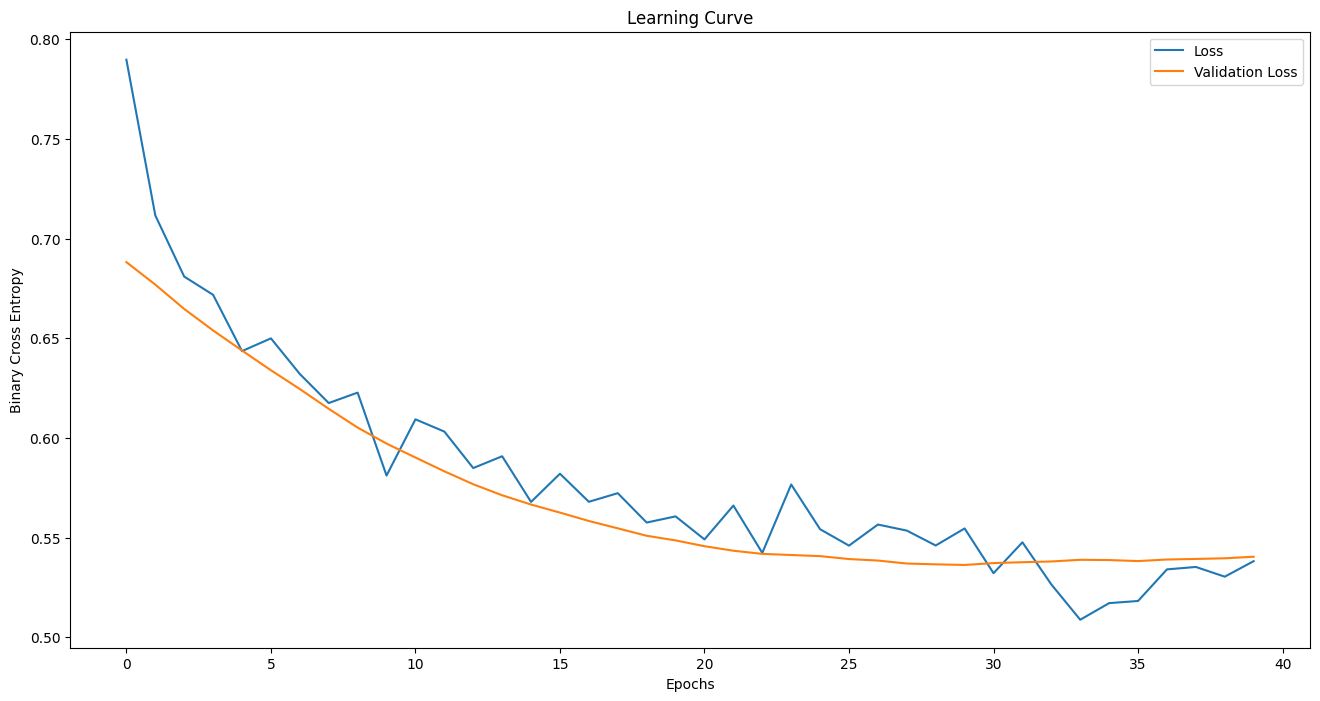

In [44]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Q19. Evaluate the model's performance using the test data.

In [45]:
# Model Accuracy
ts_loss, ts_acc = model.evaluate(xtest_scale,ytest)
print(f'Testing Binrary Cross Entropy Loss : {ts_loss:.4f}')
print(f'Testing Accuracy : {ts_acc:.4f}')

9/9 [==============================] - 0s 895us/step - loss: 0.4818 - accuracy: 0.7463
Testing Binrary Cross Entropy Loss : 0.4818
Testing Accuracy : 0.7463


In [46]:
# Predicting test data
ts_prob = model.predict(xtest_scale)
ts_prob[0:5]

9/9 [==============================] - 0s 737us/step


array([[0.3636174],
       [0.8078172],
       [0.9264197],
       [0.178263 ],
       [0.5280622]], dtype=float32)

In [47]:
# Predict with threshold value of 0.5
thr = 0.5
ypred_ts = []
for i in ts_prob:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [48]:
ypred_ts[0:5]

[0, 1, 1, 0, 1]

In [49]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       135
           1       0.75      0.74      0.75       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



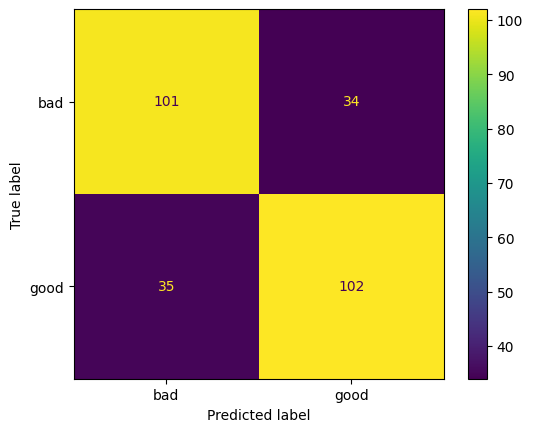

In [50]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=['bad','good'])
cfd.plot()